In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install wfdb

In [ ]:
!git clone https://github.com/zouidine/w_ecg_den.git

In [ ]:
import os
import torch
import numpy as np
from w_ecg_den.ddpm import DDPM
from w_ecg_den.model import ConditionalModel
from w_ecg_den.training import train, evaluate
from sklearn.model_selection import train_test_split
from w_ecg_den.datapreparation import Data_Preparation
from torch.utils.data import DataLoader, Subset, TensorDataset

foldername = "/content/drive/MyDrive/Colab/ISIVC"
print('folder: ', foldername)
os.makedirs(foldername, exist_ok=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
config = {
    "train":{
        "feats": 32,
        "epochs": 400,
        "batch_size": 96 ,
        "lr": 1.0e-3
        },
    "diffusion":{
        "beta_start": 0.0001,
        "beta_end": 0.5,
        "num_steps": 50,
        "schedule": "linear"
        }
    }


# To enhance reproducibility
seed = 1234
np.random.seed(seed=seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)


[X_train, y_train, X_test, y_test] = Data_Preparation(DataPath=foldername+'/data/')

X_train = torch.FloatTensor(X_train)
X_train = X_train.permute(0,2,1)

y_train = torch.FloatTensor(y_train)
y_train = y_train.permute(0,2,1)

X_test = torch.FloatTensor(X_test)
X_test = X_test.permute(0,2,1)

y_test = torch.FloatTensor(y_test)
y_test = y_test.permute(0,2,1)

train_val_set = TensorDataset(y_train, X_train)
test_set = TensorDataset(y_test, X_test)

train_idx, val_idx = train_test_split(list(range(len(train_val_set))),
                                      test_size=0.3)
train_set = Subset(train_val_set, train_idx)
val_set = Subset(train_val_set, val_idx)

train_loader = DataLoader(train_set, batch_size=config['train']['batch_size'],
                          shuffle=True, drop_last=True, num_workers=0)
val_loader = DataLoader(val_set, batch_size=config['train']['batch_size'],
                        drop_last=True, num_workers=0)
test_loader = DataLoader(test_set, batch_size=50, num_workers=0)

base_model = ConditionalModel(config['train']['feats']).to(device)
model = DDPM(base_model, config, device)
print('training ...')
train(model, config['train'], train_loader, device,
      valid_loader=val_loader, valid_epoch_interval=1,
      foldername=foldername+'/models')

folder:  /content/drive/MyDrive/Colab/ISIVC
Getting the Data ready ... 
MIT QT database saved as pickle file
MIT BIH data noise stress test database (NSTDB) saved as pickle
rnd_test shape: (13316,)
Dataset ready to use.
training ...
Adjusting learning rate of group 0 to 1.0000e-03.


  0%|          | 0/525 [00:00<?, ?it/s]<ipython-input-7-5462c5b0154b>:27: DeprecationWarning: 'saved_variables' is deprecated; use 'saved_tensors'
  matrix_L, matrix_H = ctx.saved_variables
100%|██████████| 525/525 [00:23<00:00, 21.94it/s, avg_epoch_loss=3.06e+4, epoch=0]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:04<00:00, 53.23it/s, valid_avg_epoch_loss=8.24e+3, epoch=0]



best loss is updated to  8235.461655815972 at 0 



100%|██████████| 525/525 [00:23<00:00, 22.76it/s, avg_epoch_loss=6.94e+3, epoch=1]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:04<00:00, 53.86it/s, valid_avg_epoch_loss=5.74e+3, epoch=1]



best loss is updated to  5740.982495659722 at 1 



100%|██████████| 525/525 [00:26<00:00, 19.86it/s, avg_epoch_loss=5.48e+3, epoch=2]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:04<00:00, 53.91it/s, valid_avg_epoch_loss=5.03e+3, epoch=2]



best loss is updated to  5027.294578993055 at 2 



100%|██████████| 525/525 [00:22<00:00, 23.20it/s, avg_epoch_loss=5.27e+3, epoch=3]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:22<00:00, 22.87it/s, avg_epoch_loss=4.52e+3, epoch=4]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 61.12it/s, valid_avg_epoch_loss=4.3e+3, epoch=4]



best loss is updated to  4299.469332682292 at 4 



100%|██████████| 525/525 [00:23<00:00, 22.35it/s, avg_epoch_loss=4.5e+3, epoch=5]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 64.49it/s, valid_avg_epoch_loss=4.13e+3, epoch=5]



best loss is updated to  4126.180660807292 at 5 



100%|██████████| 525/525 [00:23<00:00, 22.31it/s, avg_epoch_loss=3.93e+3, epoch=6]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 64.51it/s, valid_avg_epoch_loss=3.65e+3, epoch=6]



best loss is updated to  3646.0699484592014 at 6 



100%|██████████| 525/525 [00:23<00:00, 22.21it/s, avg_epoch_loss=4.13e+3, epoch=7]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.84it/s, avg_epoch_loss=3.61e+3, epoch=8]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.20it/s, avg_epoch_loss=3.75e+3, epoch=9]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:04<00:00, 52.76it/s, valid_avg_epoch_loss=3.58e+3, epoch=9]



best loss is updated to  3577.5521354166667 at 9 



100%|██████████| 525/525 [00:23<00:00, 22.15it/s, avg_epoch_loss=3.52e+3, epoch=10]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:26<00:00, 19.57it/s, avg_epoch_loss=3.71e+3, epoch=11]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:25<00:00, 20.85it/s, avg_epoch_loss=3.36e+3, epoch=12]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 56.81it/s, valid_avg_epoch_loss=3.3e+3, epoch=12]



best loss is updated to  3301.3698426649307 at 12 



100%|██████████| 525/525 [00:23<00:00, 22.11it/s, avg_epoch_loss=3.37e+3, epoch=13]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:04<00:00, 52.23it/s, valid_avg_epoch_loss=3.13e+3, epoch=13]



best loss is updated to  3130.380639105903 at 13 



100%|██████████| 525/525 [00:23<00:00, 22.10it/s, avg_epoch_loss=3.25e+3, epoch=14]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:05<00:00, 43.20it/s, valid_avg_epoch_loss=3.12e+3, epoch=14]



best loss is updated to  3117.506640625 at 14 



100%|██████████| 525/525 [00:24<00:00, 21.84it/s, avg_epoch_loss=3.22e+3, epoch=15]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.86it/s, avg_epoch_loss=3.34e+3, epoch=16]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.75it/s, avg_epoch_loss=3.34e+3, epoch=17]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.82it/s, avg_epoch_loss=3.12e+3, epoch=18]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.75it/s, avg_epoch_loss=3.06e+3, epoch=19]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 63.26it/s, valid_avg_epoch_loss=2.88e+3, epoch=19]



best loss is updated to  2879.69301812066 at 19 



100%|██████████| 525/525 [00:23<00:00, 21.93it/s, avg_epoch_loss=3.44e+3, epoch=20]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 58.37it/s, valid_avg_epoch_loss=2.57e+3, epoch=20]



best loss is updated to  2571.3951977539064 at 20 



100%|██████████| 525/525 [00:23<00:00, 22.08it/s, avg_epoch_loss=2.88e+3, epoch=21]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.16it/s, avg_epoch_loss=2.69e+3, epoch=22]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.01it/s, avg_epoch_loss=2.94e+3, epoch=23]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.03it/s, avg_epoch_loss=2.97e+3, epoch=24]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.77it/s, avg_epoch_loss=2.99e+3, epoch=25]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.90it/s, avg_epoch_loss=2.97e+3, epoch=26]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 63.24it/s, valid_avg_epoch_loss=2.48e+3, epoch=26]



best loss is updated to  2475.701717936198 at 26 



100%|██████████| 525/525 [00:23<00:00, 22.00it/s, avg_epoch_loss=2.63e+3, epoch=27]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.06it/s, avg_epoch_loss=3.05e+3, epoch=28]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.09it/s, avg_epoch_loss=3.09e+3, epoch=29]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.05it/s, avg_epoch_loss=3.1e+3, epoch=30]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.91it/s, avg_epoch_loss=2.87e+3, epoch=31]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.78it/s, avg_epoch_loss=2.95e+3, epoch=32]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.80it/s, avg_epoch_loss=2.83e+3, epoch=33]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.88it/s, avg_epoch_loss=2.82e+3, epoch=34]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.06it/s, avg_epoch_loss=2.84e+3, epoch=35]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.63it/s, avg_epoch_loss=2.62e+3, epoch=36]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.12it/s, avg_epoch_loss=2.8e+3, epoch=37]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.79it/s, avg_epoch_loss=2.61e+3, epoch=38]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.70it/s, avg_epoch_loss=2.73e+3, epoch=39]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.76it/s, avg_epoch_loss=2.87e+3, epoch=40]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.77it/s, avg_epoch_loss=2.72e+3, epoch=41]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.75it/s, avg_epoch_loss=2.93e+3, epoch=42]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 61.36it/s, valid_avg_epoch_loss=2.46e+3, epoch=42]



best loss is updated to  2457.3399400499134 at 42 



100%|██████████| 525/525 [00:23<00:00, 22.09it/s, avg_epoch_loss=2.67e+3, epoch=43]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.11it/s, avg_epoch_loss=2.68e+3, epoch=44]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.99it/s, avg_epoch_loss=2.34e+3, epoch=45]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 57.71it/s, valid_avg_epoch_loss=2.33e+3, epoch=45]



best loss is updated to  2331.4881350368923 at 45 



100%|██████████| 525/525 [00:23<00:00, 21.89it/s, avg_epoch_loss=2.56e+3, epoch=46]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.73it/s, avg_epoch_loss=2.88e+3, epoch=47]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.71it/s, avg_epoch_loss=2.79e+3, epoch=48]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.80it/s, avg_epoch_loss=2.47e+3, epoch=49]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.89it/s, avg_epoch_loss=2.83e+3, epoch=50]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.96it/s, avg_epoch_loss=2.78e+3, epoch=51]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.03it/s, avg_epoch_loss=2.54e+3, epoch=52]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.84it/s, avg_epoch_loss=2.78e+3, epoch=53]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 58.89it/s, valid_avg_epoch_loss=2.23e+3, epoch=53]



best loss is updated to  2233.182413736979 at 53 



100%|██████████| 525/525 [00:24<00:00, 21.80it/s, avg_epoch_loss=2.49e+3, epoch=54]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.65it/s, avg_epoch_loss=2.45e+3, epoch=55]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.69it/s, avg_epoch_loss=2.35e+3, epoch=56]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 62.78it/s, valid_avg_epoch_loss=2.2e+3, epoch=56]



best loss is updated to  2195.3822848849827 at 56 



100%|██████████| 525/525 [00:24<00:00, 21.79it/s, avg_epoch_loss=2.42e+3, epoch=57]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.96it/s, avg_epoch_loss=2.56e+3, epoch=58]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.97it/s, avg_epoch_loss=2.99e+3, epoch=59]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.98it/s, avg_epoch_loss=2.32e+3, epoch=60]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.69it/s, avg_epoch_loss=2.84e+3, epoch=61]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.71it/s, avg_epoch_loss=2.61e+3, epoch=62]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 62.72it/s, valid_avg_epoch_loss=2.19e+3, epoch=62]



best loss is updated to  2189.4784535047743 at 62 



100%|██████████| 525/525 [00:24<00:00, 21.62it/s, avg_epoch_loss=2.83e+3, epoch=63]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 61.64it/s, valid_avg_epoch_loss=2.09e+3, epoch=63]



best loss is updated to  2088.9574858940973 at 63 



100%|██████████| 525/525 [00:24<00:00, 21.01it/s, avg_epoch_loss=2.53e+3, epoch=64]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 22.02it/s, avg_epoch_loss=2.41e+3, epoch=65]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:04<00:00, 53.78it/s, valid_avg_epoch_loss=2.05e+3, epoch=65]



best loss is updated to  2052.740802951389 at 65 



100%|██████████| 525/525 [00:23<00:00, 21.95it/s, avg_epoch_loss=2.53e+3, epoch=66]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.72it/s, avg_epoch_loss=2.59e+3, epoch=67]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=2.51e+3, epoch=68]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.57it/s, avg_epoch_loss=2.59e+3, epoch=69]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.69it/s, avg_epoch_loss=2.45e+3, epoch=70]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.72it/s, avg_epoch_loss=2.44e+3, epoch=71]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.84it/s, avg_epoch_loss=2.68e+3, epoch=72]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.96it/s, avg_epoch_loss=2.43e+3, epoch=73]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.87it/s, avg_epoch_loss=2.64e+3, epoch=74]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.72it/s, avg_epoch_loss=2.18e+3, epoch=75]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.59it/s, avg_epoch_loss=2.55e+3, epoch=76]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.58it/s, avg_epoch_loss=2.21e+3, epoch=77]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=2.34e+3, epoch=78]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.73it/s, avg_epoch_loss=2.29e+3, epoch=79]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.96it/s, avg_epoch_loss=2.22e+3, epoch=80]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.83it/s, avg_epoch_loss=2.2e+3, epoch=81]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=2.49e+3, epoch=82]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.52it/s, avg_epoch_loss=2.31e+3, epoch=83]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.59it/s, avg_epoch_loss=2.48e+3, epoch=84]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.52it/s, avg_epoch_loss=2.65e+3, epoch=85]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.66it/s, avg_epoch_loss=2.28e+3, epoch=86]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.78it/s, avg_epoch_loss=2.42e+3, epoch=87]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.96it/s, avg_epoch_loss=2.36e+3, epoch=88]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.85it/s, avg_epoch_loss=2.31e+3, epoch=89]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:04<00:00, 55.21it/s, valid_avg_epoch_loss=1.97e+3, epoch=89]



best loss is updated to  1974.3616696506076 at 89 



100%|██████████| 525/525 [00:24<00:00, 21.03it/s, avg_epoch_loss=2.31e+3, epoch=90]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 57.10it/s, valid_avg_epoch_loss=1.77e+3, epoch=90]



best loss is updated to  1772.318948296441 at 90 



100%|██████████| 525/525 [00:25<00:00, 20.45it/s, avg_epoch_loss=2.43e+3, epoch=91]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.57it/s, avg_epoch_loss=2.26e+3, epoch=92]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.57it/s, avg_epoch_loss=2.31e+3, epoch=93]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=2.45e+3, epoch=94]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.87it/s, avg_epoch_loss=2.25e+3, epoch=95]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.93it/s, avg_epoch_loss=2.48e+3, epoch=96]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.62it/s, avg_epoch_loss=2.21e+3, epoch=97]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.63it/s, avg_epoch_loss=2.19e+3, epoch=98]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.65it/s, avg_epoch_loss=2.7e+3, epoch=99]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.53it/s, avg_epoch_loss=2.44e+3, epoch=100]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.57it/s, avg_epoch_loss=2.29e+3, epoch=101]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.71it/s, avg_epoch_loss=2.58e+3, epoch=102]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.81it/s, avg_epoch_loss=2.47e+3, epoch=103]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.81it/s, avg_epoch_loss=2.22e+3, epoch=104]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.77it/s, avg_epoch_loss=2.29e+3, epoch=105]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.56it/s, avg_epoch_loss=2.35e+3, epoch=106]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.42it/s, avg_epoch_loss=2.52e+3, epoch=107]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.56it/s, avg_epoch_loss=2.52e+3, epoch=108]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=2.66e+3, epoch=109]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.74it/s, avg_epoch_loss=2.38e+3, epoch=110]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.83it/s, avg_epoch_loss=2.3e+3, epoch=111]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.95it/s, avg_epoch_loss=2.7e+3, epoch=112]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.84it/s, avg_epoch_loss=2.45e+3, epoch=113]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.74it/s, avg_epoch_loss=2.06e+3, epoch=114]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=2.23e+3, epoch=115]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.57it/s, avg_epoch_loss=2.39e+3, epoch=116]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.42it/s, avg_epoch_loss=2.4e+3, epoch=117]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.73it/s, avg_epoch_loss=2.39e+3, epoch=118]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.50it/s, avg_epoch_loss=2.16e+3, epoch=119]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.67it/s, avg_epoch_loss=2.46e+3, epoch=120]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.56it/s, avg_epoch_loss=2.54e+3, epoch=121]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.60it/s, avg_epoch_loss=2.4e+3, epoch=122]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.86it/s, avg_epoch_loss=2.25e+3, epoch=123]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:23<00:00, 21.89it/s, avg_epoch_loss=2.31e+3, epoch=124]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.82it/s, avg_epoch_loss=2.37e+3, epoch=125]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.71it/s, avg_epoch_loss=2.17e+3, epoch=126]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.65it/s, avg_epoch_loss=2.54e+3, epoch=127]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 225/225 [00:03<00:00, 61.38it/s, valid_avg_epoch_loss=1.47e+3, epoch=127]



best loss is updated to  1471.0083576117622 at 127 



100%|██████████| 525/525 [00:24<00:00, 21.63it/s, avg_epoch_loss=2.28e+3, epoch=128]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.52it/s, avg_epoch_loss=2.26e+3, epoch=129]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.82it/s, avg_epoch_loss=2.57e+3, epoch=130]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.85it/s, avg_epoch_loss=2.39e+3, epoch=131]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.82it/s, avg_epoch_loss=2.15e+3, epoch=132]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.68it/s, avg_epoch_loss=2.11e+3, epoch=133]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.53it/s, avg_epoch_loss=2.35e+3, epoch=134]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.55it/s, avg_epoch_loss=2.45e+3, epoch=135]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.48it/s, avg_epoch_loss=2.16e+3, epoch=136]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.71it/s, avg_epoch_loss=2.27e+3, epoch=137]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.66it/s, avg_epoch_loss=2.47e+3, epoch=138]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.75it/s, avg_epoch_loss=2.13e+3, epoch=139]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.60it/s, avg_epoch_loss=2e+3, epoch=140]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.42it/s, avg_epoch_loss=2.39e+3, epoch=141]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.50it/s, avg_epoch_loss=2.22e+3, epoch=142]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.44it/s, avg_epoch_loss=2.39e+3, epoch=143]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.20it/s, avg_epoch_loss=2.32e+3, epoch=144]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.75it/s, avg_epoch_loss=2.36e+3, epoch=145]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=2.48e+3, epoch=146]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.47it/s, avg_epoch_loss=2.27e+3, epoch=147]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.47it/s, avg_epoch_loss=2.1e+3, epoch=148]


Adjusting learning rate of group 0 to 1.0000e-03.


100%|██████████| 525/525 [00:24<00:00, 21.38it/s, avg_epoch_loss=2.19e+3, epoch=149]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.43it/s, avg_epoch_loss=1.57e+3, epoch=150]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.47it/s, avg_epoch_loss=1.69e+3, epoch=151]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.74it/s, avg_epoch_loss=1.54e+3, epoch=152]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.75it/s, avg_epoch_loss=1.76e+3, epoch=153]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.54it/s, avg_epoch_loss=1.88e+3, epoch=154]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.24it/s, avg_epoch_loss=1.66e+3, epoch=155]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.12it/s, avg_epoch_loss=1.57e+3, epoch=156]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.34it/s, avg_epoch_loss=1.58e+3, epoch=157]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.41it/s, avg_epoch_loss=1.67e+3, epoch=158]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.56it/s, avg_epoch_loss=1.58e+3, epoch=159]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=1.83e+3, epoch=160]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.51it/s, avg_epoch_loss=1.44e+3, epoch=161]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.53it/s, avg_epoch_loss=1.6e+3, epoch=162]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.21it/s, avg_epoch_loss=1.76e+3, epoch=163]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 225/225 [00:03<00:00, 59.54it/s, valid_avg_epoch_loss=1.4e+3, epoch=163]



best loss is updated to  1397.488330891927 at 163 



100%|██████████| 525/525 [00:24<00:00, 21.28it/s, avg_epoch_loss=1.84e+3, epoch=164]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 225/225 [00:03<00:00, 60.42it/s, valid_avg_epoch_loss=1.17e+3, epoch=164]



best loss is updated to  1170.32451687283 at 164 



100%|██████████| 525/525 [00:24<00:00, 21.35it/s, avg_epoch_loss=1.35e+3, epoch=165]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.49it/s, avg_epoch_loss=1.79e+3, epoch=166]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.59it/s, avg_epoch_loss=1.46e+3, epoch=167]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.62it/s, avg_epoch_loss=1.64e+3, epoch=168]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:25<00:00, 20.85it/s, avg_epoch_loss=1.64e+3, epoch=169]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.28it/s, avg_epoch_loss=1.6e+3, epoch=170]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.38it/s, avg_epoch_loss=1.49e+3, epoch=171]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.50it/s, avg_epoch_loss=1.69e+3, epoch=172]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.65it/s, avg_epoch_loss=1.42e+3, epoch=173]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.48it/s, avg_epoch_loss=1.53e+3, epoch=174]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.53it/s, avg_epoch_loss=1.81e+3, epoch=175]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.26it/s, avg_epoch_loss=1.55e+3, epoch=176]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.39it/s, avg_epoch_loss=1.56e+3, epoch=177]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.38it/s, avg_epoch_loss=1.72e+3, epoch=178]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.55it/s, avg_epoch_loss=1.24e+3, epoch=179]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.56it/s, avg_epoch_loss=1.8e+3, epoch=180]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.65it/s, avg_epoch_loss=1.8e+3, epoch=181]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.50it/s, avg_epoch_loss=1.81e+3, epoch=182]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.37it/s, avg_epoch_loss=1.7e+3, epoch=183]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.39it/s, avg_epoch_loss=1.37e+3, epoch=184]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.37it/s, avg_epoch_loss=1.36e+3, epoch=185]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.43it/s, avg_epoch_loss=1.34e+3, epoch=186]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.63it/s, avg_epoch_loss=1.61e+3, epoch=187]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.65it/s, avg_epoch_loss=1.78e+3, epoch=188]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.43it/s, avg_epoch_loss=1.67e+3, epoch=189]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.32it/s, avg_epoch_loss=1.68e+3, epoch=190]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.26it/s, avg_epoch_loss=1.67e+3, epoch=191]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.25it/s, avg_epoch_loss=1.2e+3, epoch=192]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:25<00:00, 20.71it/s, avg_epoch_loss=1.65e+3, epoch=193]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.52it/s, avg_epoch_loss=1.73e+3, epoch=194]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.59it/s, avg_epoch_loss=1.75e+3, epoch=195]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.40it/s, avg_epoch_loss=1.74e+3, epoch=196]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.43it/s, avg_epoch_loss=1.56e+3, epoch=197]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.29it/s, avg_epoch_loss=1.45e+3, epoch=198]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.20it/s, avg_epoch_loss=1.59e+3, epoch=199]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.39it/s, avg_epoch_loss=1.56e+3, epoch=200]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.35it/s, avg_epoch_loss=1.57e+3, epoch=201]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.56it/s, avg_epoch_loss=1.5e+3, epoch=202]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.67it/s, avg_epoch_loss=1.64e+3, epoch=203]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.42it/s, avg_epoch_loss=1.33e+3, epoch=204]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.23it/s, avg_epoch_loss=1.57e+3, epoch=205]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.45it/s, avg_epoch_loss=1.6e+3, epoch=206]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.29it/s, avg_epoch_loss=1.62e+3, epoch=207]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.59it/s, avg_epoch_loss=1.61e+3, epoch=208]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.67it/s, avg_epoch_loss=1.56e+3, epoch=209]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.42it/s, avg_epoch_loss=1.58e+3, epoch=210]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.27it/s, avg_epoch_loss=1.87e+3, epoch=211]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.23it/s, avg_epoch_loss=1.59e+3, epoch=212]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.29it/s, avg_epoch_loss=1.41e+3, epoch=213]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.39it/s, avg_epoch_loss=1.44e+3, epoch=214]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.46it/s, avg_epoch_loss=1.31e+3, epoch=215]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.46it/s, avg_epoch_loss=1.52e+3, epoch=216]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:25<00:00, 20.24it/s, avg_epoch_loss=1.54e+3, epoch=217]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.35it/s, avg_epoch_loss=1.51e+3, epoch=218]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.50it/s, avg_epoch_loss=1.81e+3, epoch=219]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.52it/s, avg_epoch_loss=1.52e+3, epoch=220]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.24it/s, avg_epoch_loss=1.58e+3, epoch=221]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.30it/s, avg_epoch_loss=1.58e+3, epoch=222]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.21it/s, avg_epoch_loss=1.64e+3, epoch=223]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.18it/s, avg_epoch_loss=1.45e+3, epoch=224]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.52it/s, avg_epoch_loss=1.73e+3, epoch=225]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.55it/s, avg_epoch_loss=1.59e+3, epoch=226]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.44it/s, avg_epoch_loss=1.62e+3, epoch=227]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.46it/s, avg_epoch_loss=1.45e+3, epoch=228]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.24it/s, avg_epoch_loss=1.71e+3, epoch=229]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.18it/s, avg_epoch_loss=1.58e+3, epoch=230]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.25it/s, avg_epoch_loss=1.53e+3, epoch=231]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.55it/s, avg_epoch_loss=1.63e+3, epoch=232]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.45it/s, avg_epoch_loss=1.64e+3, epoch=233]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.15it/s, avg_epoch_loss=1.71e+3, epoch=234]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.26it/s, avg_epoch_loss=1.58e+3, epoch=235]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.14it/s, avg_epoch_loss=1.44e+3, epoch=236]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.26it/s, avg_epoch_loss=1.38e+3, epoch=237]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.45it/s, avg_epoch_loss=1.48e+3, epoch=238]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.51it/s, avg_epoch_loss=1.34e+3, epoch=239]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.57it/s, avg_epoch_loss=1.46e+3, epoch=240]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:25<00:00, 20.58it/s, avg_epoch_loss=1.45e+3, epoch=241]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.40it/s, avg_epoch_loss=1.6e+3, epoch=242]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.60it/s, avg_epoch_loss=1.75e+3, epoch=243]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.53it/s, avg_epoch_loss=1.79e+3, epoch=244]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.18it/s, avg_epoch_loss=1.78e+3, epoch=245]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.15it/s, avg_epoch_loss=1.37e+3, epoch=246]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.21it/s, avg_epoch_loss=1.3e+3, epoch=247]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.19it/s, avg_epoch_loss=1.65e+3, epoch=248]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.53it/s, avg_epoch_loss=1.3e+3, epoch=249]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.56it/s, avg_epoch_loss=1.51e+3, epoch=250]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.33it/s, avg_epoch_loss=1.55e+3, epoch=251]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.29it/s, avg_epoch_loss=1.61e+3, epoch=252]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.31it/s, avg_epoch_loss=1.54e+3, epoch=253]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.27it/s, avg_epoch_loss=1.29e+3, epoch=254]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.28it/s, avg_epoch_loss=1.7e+3, epoch=255]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.34it/s, avg_epoch_loss=1.44e+3, epoch=256]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.60it/s, avg_epoch_loss=1.42e+3, epoch=257]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.53it/s, avg_epoch_loss=1.47e+3, epoch=258]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.25it/s, avg_epoch_loss=1.68e+3, epoch=259]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.33it/s, avg_epoch_loss=1.35e+3, epoch=260]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.33it/s, avg_epoch_loss=1.53e+3, epoch=261]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.41it/s, avg_epoch_loss=1.59e+3, epoch=262]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.56it/s, avg_epoch_loss=1.69e+3, epoch=263]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:25<00:00, 20.79it/s, avg_epoch_loss=1.58e+3, epoch=264]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.14it/s, avg_epoch_loss=1.42e+3, epoch=265]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.19it/s, avg_epoch_loss=1.3e+3, epoch=266]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.37it/s, avg_epoch_loss=1.38e+3, epoch=267]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.50it/s, avg_epoch_loss=1.51e+3, epoch=268]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.55it/s, avg_epoch_loss=1.56e+3, epoch=269]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.36it/s, avg_epoch_loss=1.62e+3, epoch=270]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.11it/s, avg_epoch_loss=1.41e+3, epoch=271]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.20it/s, avg_epoch_loss=1.59e+3, epoch=272]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.21it/s, avg_epoch_loss=1.37e+3, epoch=273]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.38it/s, avg_epoch_loss=1.58e+3, epoch=274]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.54it/s, avg_epoch_loss=1.34e+3, epoch=275]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.33it/s, avg_epoch_loss=1.45e+3, epoch=276]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.04it/s, avg_epoch_loss=1.42e+3, epoch=277]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.20it/s, avg_epoch_loss=1.65e+3, epoch=278]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.12it/s, avg_epoch_loss=1.38e+3, epoch=279]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.31it/s, avg_epoch_loss=1.54e+3, epoch=280]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.53it/s, avg_epoch_loss=1.48e+3, epoch=281]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.44it/s, avg_epoch_loss=1.67e+3, epoch=282]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.45it/s, avg_epoch_loss=1.71e+3, epoch=283]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.26it/s, avg_epoch_loss=1.54e+3, epoch=284]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.29it/s, avg_epoch_loss=1.9e+3, epoch=285]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.33it/s, avg_epoch_loss=1.31e+3, epoch=286]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.11it/s, avg_epoch_loss=1.38e+3, epoch=287]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.24it/s, avg_epoch_loss=1.48e+3, epoch=288]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.07it/s, avg_epoch_loss=1.53e+3, epoch=289]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:25<00:00, 20.97it/s, avg_epoch_loss=1.55e+3, epoch=290]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.16it/s, avg_epoch_loss=1.48e+3, epoch=291]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.14it/s, avg_epoch_loss=1.45e+3, epoch=292]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.34it/s, avg_epoch_loss=1.39e+3, epoch=293]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.47it/s, avg_epoch_loss=1.79e+3, epoch=294]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.39it/s, avg_epoch_loss=1.58e+3, epoch=295]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.26it/s, avg_epoch_loss=1.62e+3, epoch=296]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.12it/s, avg_epoch_loss=1.52e+3, epoch=297]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.09it/s, avg_epoch_loss=1.53e+3, epoch=298]


Adjusting learning rate of group 0 to 1.0000e-04.


100%|██████████| 525/525 [00:24<00:00, 21.18it/s, avg_epoch_loss=1.24e+3, epoch=299]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.24it/s, avg_epoch_loss=1.49e+3, epoch=300]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.64it/s, avg_epoch_loss=1.44e+3, epoch=301]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.21it/s, avg_epoch_loss=1.39e+3, epoch=302]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.30it/s, avg_epoch_loss=1.48e+3, epoch=303]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.32it/s, avg_epoch_loss=1.5e+3, epoch=304]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.11it/s, avg_epoch_loss=1.46e+3, epoch=305]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.31it/s, avg_epoch_loss=1.52e+3, epoch=306]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.41it/s, avg_epoch_loss=1.4e+3, epoch=307]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.48it/s, avg_epoch_loss=1.45e+3, epoch=308]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.83it/s, avg_epoch_loss=1.67e+3, epoch=309]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.44it/s, avg_epoch_loss=1.67e+3, epoch=310]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.48it/s, avg_epoch_loss=1.4e+3, epoch=311]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.26it/s, avg_epoch_loss=1.51e+3, epoch=312]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.17it/s, avg_epoch_loss=1.55e+3, epoch=313]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.04it/s, avg_epoch_loss=1.55e+3, epoch=314]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.25it/s, avg_epoch_loss=1.39e+3, epoch=315]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.34it/s, avg_epoch_loss=1.52e+3, epoch=316]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.49it/s, avg_epoch_loss=1.28e+3, epoch=317]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.31it/s, avg_epoch_loss=1.53e+3, epoch=318]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.10it/s, avg_epoch_loss=1.48e+3, epoch=319]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.18it/s, avg_epoch_loss=1.4e+3, epoch=320]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.30it/s, avg_epoch_loss=1.44e+3, epoch=321]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.24it/s, avg_epoch_loss=1.59e+3, epoch=322]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.45it/s, avg_epoch_loss=1.73e+3, epoch=323]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.46it/s, avg_epoch_loss=1.32e+3, epoch=324]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.15it/s, avg_epoch_loss=1.54e+3, epoch=325]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 225/225 [00:03<00:00, 57.70it/s, valid_avg_epoch_loss=1.16e+3, epoch=325]



best loss is updated to  1156.3921066623263 at 325 



100%|██████████| 525/525 [00:24<00:00, 21.12it/s, avg_epoch_loss=1.37e+3, epoch=326]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.11it/s, avg_epoch_loss=1.44e+3, epoch=327]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.17it/s, avg_epoch_loss=1.33e+3, epoch=328]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 225/225 [00:04<00:00, 53.12it/s, valid_avg_epoch_loss=1.14e+3, epoch=328]



best loss is updated to  1139.023230963813 at 328 



100%|██████████| 525/525 [00:24<00:00, 21.42it/s, avg_epoch_loss=1.54e+3, epoch=329]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.34it/s, avg_epoch_loss=1.3e+3, epoch=330]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.90it/s, avg_epoch_loss=1.57e+3, epoch=331]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.98it/s, avg_epoch_loss=1.38e+3, epoch=332]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.98it/s, avg_epoch_loss=1.47e+3, epoch=333]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.02it/s, avg_epoch_loss=1.23e+3, epoch=334]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.21it/s, avg_epoch_loss=1.73e+3, epoch=335]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.28it/s, avg_epoch_loss=1.55e+3, epoch=336]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.35it/s, avg_epoch_loss=1.49e+3, epoch=337]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.19it/s, avg_epoch_loss=1.62e+3, epoch=338]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.97it/s, avg_epoch_loss=1.39e+3, epoch=339]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.18it/s, avg_epoch_loss=1.4e+3, epoch=340]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.23it/s, avg_epoch_loss=1.31e+3, epoch=341]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.34it/s, avg_epoch_loss=1.36e+3, epoch=342]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.15it/s, avg_epoch_loss=1.53e+3, epoch=343]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.12it/s, avg_epoch_loss=1.73e+3, epoch=344]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.03it/s, avg_epoch_loss=1.3e+3, epoch=345]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.20it/s, avg_epoch_loss=1.52e+3, epoch=346]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.42it/s, avg_epoch_loss=1.45e+3, epoch=347]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.39it/s, avg_epoch_loss=1.37e+3, epoch=348]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.12it/s, avg_epoch_loss=1.5e+3, epoch=349]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.15it/s, avg_epoch_loss=1.38e+3, epoch=350]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.05it/s, avg_epoch_loss=1.59e+3, epoch=351]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.21it/s, avg_epoch_loss=1.45e+3, epoch=352]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.96it/s, avg_epoch_loss=1.22e+3, epoch=353]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.97it/s, avg_epoch_loss=1.54e+3, epoch=354]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.96it/s, avg_epoch_loss=1.35e+3, epoch=355]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.98it/s, avg_epoch_loss=1.33e+3, epoch=356]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.16it/s, avg_epoch_loss=1.51e+3, epoch=357]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.43it/s, avg_epoch_loss=1.54e+3, epoch=358]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.37it/s, avg_epoch_loss=1.56e+3, epoch=359]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.24it/s, avg_epoch_loss=1.46e+3, epoch=360]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.16it/s, avg_epoch_loss=1.52e+3, epoch=361]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.93it/s, avg_epoch_loss=1.46e+3, epoch=362]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 225/225 [00:03<00:00, 57.16it/s, valid_avg_epoch_loss=1.02e+3, epoch=362]



best loss is updated to  1021.7815670437283 at 362 



100%|██████████| 525/525 [00:24<00:00, 21.36it/s, avg_epoch_loss=1.59e+3, epoch=363]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.48it/s, avg_epoch_loss=1.46e+3, epoch=364]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.29it/s, avg_epoch_loss=1.43e+3, epoch=365]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.16it/s, avg_epoch_loss=1.5e+3, epoch=366]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.28it/s, avg_epoch_loss=1.68e+3, epoch=367]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.23it/s, avg_epoch_loss=1.32e+3, epoch=368]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.28it/s, avg_epoch_loss=1.45e+3, epoch=369]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.40it/s, avg_epoch_loss=1.66e+3, epoch=370]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.33it/s, avg_epoch_loss=1.37e+3, epoch=371]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.17it/s, avg_epoch_loss=1.47e+3, epoch=372]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.14it/s, avg_epoch_loss=1.48e+3, epoch=373]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.39it/s, avg_epoch_loss=1.49e+3, epoch=374]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 20.91it/s, avg_epoch_loss=1.25e+3, epoch=375]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.12it/s, avg_epoch_loss=1.63e+3, epoch=376]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.12it/s, avg_epoch_loss=1.26e+3, epoch=377]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.21it/s, avg_epoch_loss=1.45e+3, epoch=378]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.28it/s, avg_epoch_loss=1.37e+3, epoch=379]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.47it/s, avg_epoch_loss=1.5e+3, epoch=380]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.33it/s, avg_epoch_loss=1.48e+3, epoch=381]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.15it/s, avg_epoch_loss=1.33e+3, epoch=382]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.18it/s, avg_epoch_loss=1.43e+3, epoch=383]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.09it/s, avg_epoch_loss=1.6e+3, epoch=384]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.22it/s, avg_epoch_loss=1.7e+3, epoch=385]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.43it/s, avg_epoch_loss=1.53e+3, epoch=386]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.06it/s, avg_epoch_loss=1.39e+3, epoch=387]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.02it/s, avg_epoch_loss=1.55e+3, epoch=388]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.08it/s, avg_epoch_loss=1.55e+3, epoch=389]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 21.00it/s, avg_epoch_loss=1.64e+3, epoch=390]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.38it/s, avg_epoch_loss=1.63e+3, epoch=391]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.05it/s, avg_epoch_loss=1.42e+3, epoch=392]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.08it/s, avg_epoch_loss=1.61e+3, epoch=393]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 225/225 [00:03<00:00, 56.89it/s, valid_avg_epoch_loss=979, epoch=393]



best loss is updated to  978.9178291490343 at 393 



100%|██████████| 525/525 [00:24<00:00, 21.02it/s, avg_epoch_loss=1.4e+3, epoch=394]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.03it/s, avg_epoch_loss=1.38e+3, epoch=395]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.14it/s, avg_epoch_loss=1.58e+3, epoch=396]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:25<00:00, 21.00it/s, avg_epoch_loss=1.31e+3, epoch=397]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.07it/s, avg_epoch_loss=1.38e+3, epoch=398]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 525/525 [00:24<00:00, 21.13it/s, avg_epoch_loss=1.41e+3, epoch=399]


Adjusting learning rate of group 0 to 1.0000e-05.


100%|██████████| 225/225 [00:04<00:00, 50.92it/s, valid_avg_epoch_loss=1.39e+3, epoch=399]


In [ ]:
#don't use before final model is determined
print('eval test ...')
output_path = "w_ecg_den/checkpoint/bestmodel.pth"
model.load_state_dict(torch.load(output_path))
evaluate(model, test_loader, 5, device, foldername=foldername)

eval test ...


100%|██████████| 267/267 [02:33<00:00,  1.74it/s, ssd_total=4.57, mad_total=0.372, prd_total=43.7, cos_sim_total=0.914]


ssd_total:  4.568349219614695
mad_total:  0.37246104180544265
prd_total:  43.678767100294344
cos_sim_total:  0.9135621409045214


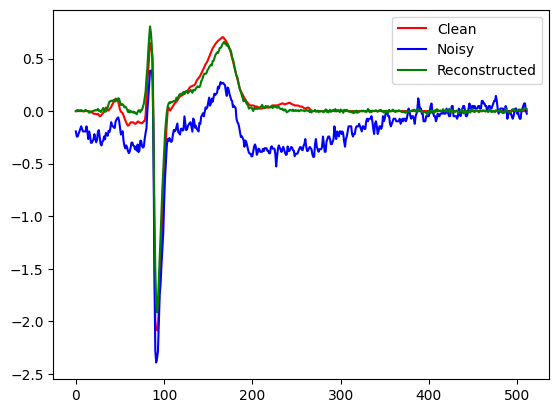

In [ ]:
import matplotlib.pyplot as plt
i = 1000
output = model.denoising(X_test[i].unsqueeze(0).to(device))

plt.plot(y_test[i].squeeze(0).cpu().detach().numpy(), 'r', label='Clean') # Clean
plt.plot(X_test[i].squeeze(0).cpu().detach().numpy(), 'b', label='Noisy') # Noisy
plt.plot(output.squeeze(0).squeeze(0).cpu().detach().numpy(), 'g', label='Reconstructed') # Reconstructed
plt.legend()